In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
import anndata
import scipy.io as sio

# Wu analysis

In [2]:
wu = sc.read_h5ad('./processed/wu_filtered.h5ad')

In [3]:
wu

AnnData object with n_obs × n_vars = 34968 × 20790
    obs: 'barcode', 'cell_type_original', 'cell_type_original_subset', 'BC subtype', 'Patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_name', 'gene_name1', 'type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

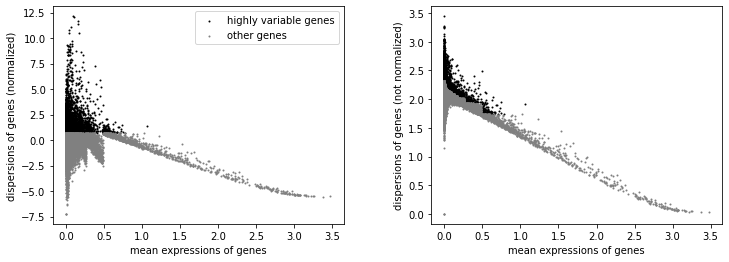

In [6]:
sc.pp.highly_variable_genes(wu, n_top_genes=5000, flavor='cell_ranger')
sc.pl.highly_variable_genes(wu)

In [7]:
wu5000 = wu[:, wu.var.highly_variable]

In [8]:
wu5000

View of AnnData object with n_obs × n_vars = 34968 × 5000
    obs: 'barcode', 'cell_type_original', 'cell_type_original_subset', 'BC subtype', 'Patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_name', 'gene_name1', 'type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [9]:
sc.pp.regress_out(wu5000, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(wu5000, max_value=10)

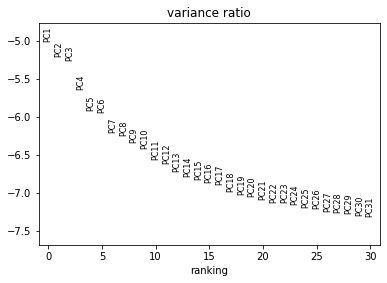

In [10]:
sc.tl.pca(wu5000)
sc.pl.pca_variance_ratio(wu5000, log=True)

In [11]:
sc.pp.neighbors(wu5000, n_neighbors=30, n_pcs=10)

In [12]:
sc.tl.leiden(wu5000, resolution=0.5)
sc.tl.paga(wu5000)
sc.pl.paga(wu5000, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(wu5000, init_pos='paga')

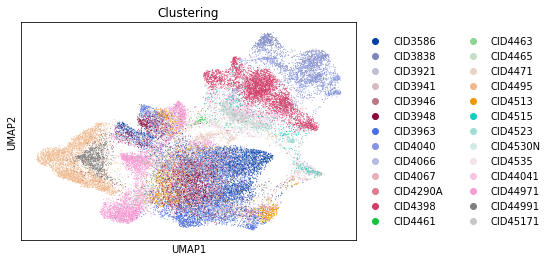

In [15]:
sc.pl.umap(wu5000, color=['Patient'], title='Clustering')

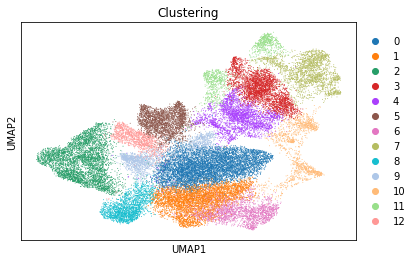

In [16]:
sc.pl.umap(wu5000, color=['leiden'], title='Clustering')

In [68]:
wu.obs['leiden'] = wu5000.obs['leiden']

In [67]:
wu5000

AnnData object with n_obs × n_vars = 34968 × 5000
    obs: 'barcode', 'cell_type_original', 'cell_type_original_subset', 'BC subtype', 'Patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden'
    var: 'gene_name', 'gene_name1', 'type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'Patient_colors', 'cell_type_original_subset_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Batch correction

In [20]:
import bbknn

In [21]:
bbknn.bbknn(wu5000, batch_key='Patient')

In [22]:
wu5000

AnnData object with n_obs × n_vars = 34968 × 5000
    obs: 'barcode', 'cell_type_original', 'cell_type_original_subset', 'BC subtype', 'Patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden'
    var: 'gene_name', 'gene_name1', 'type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'Patient_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [23]:
sc.tl.leiden(wu5000, resolution=0.5)
sc.tl.paga(wu5000)
sc.pl.paga(wu5000, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(wu5000, init_pos='paga')

In [56]:
sc.tl.leiden(wu5000, resolution=1.0)


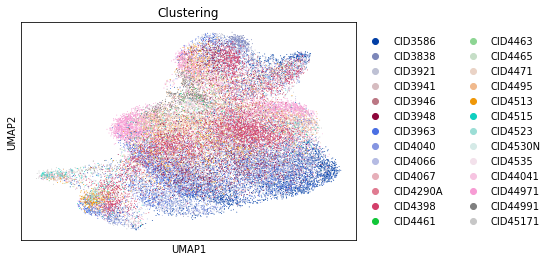

In [24]:
sc.pl.umap(wu5000, color=['Patient'], title='Clustering')

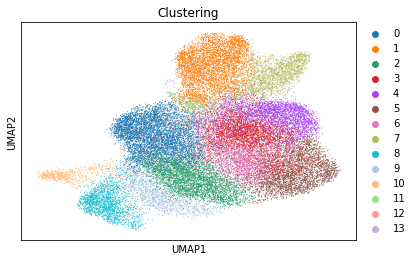

In [57]:
sc.pl.umap(wu5000, color=['leiden'], title='Clustering')

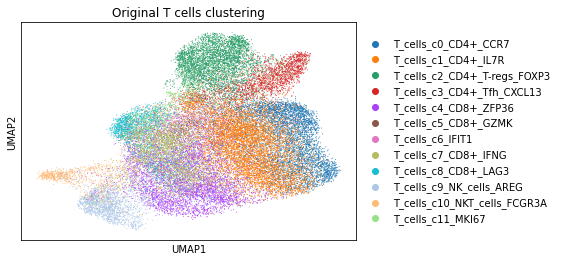

In [35]:
sc.pl.umap(wu5000, color=['cell_type_original_subset'], title='Original T cells clustering')

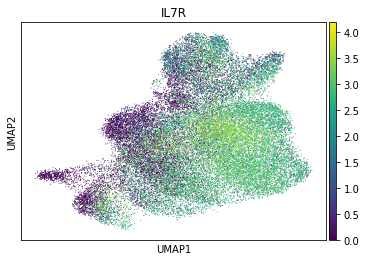

In [62]:
sc.pl.umap(wu, color=['IL7R'])

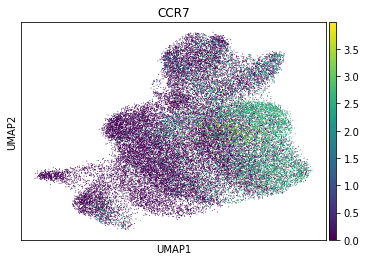

In [53]:
sc.pl.umap(wu, color=['CCR7'])

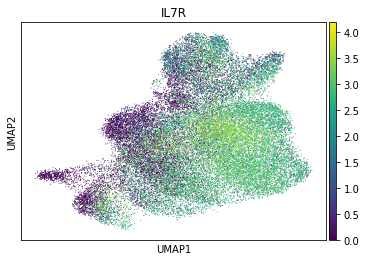

In [52]:
sc.pl.umap(wu, color=['IL7R'])

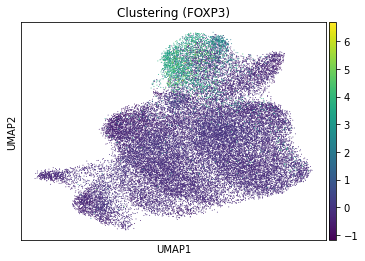

In [32]:
sc.pl.umap(wu5000, color=['FOXP3'], title='Clustering (FOXP3)')

In [51]:
wu.obsm['X_umap'] = wu5000.obsm['X_umap']

In [71]:
results_file = './processed/wu_batch_corr_clu.h5ad'
wu.write(results_file)

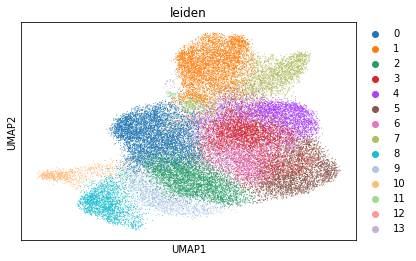

In [70]:
sc.pl.umap(wu, color=['leiden'])